# Turnpike example (example from Trélat)
## Definition of the optimal control problem


$$
    \left\{
    \begin{array}{l}
        \min 0.5\int_{0}^{1}\left((y_1(t)-1)^2+(y_2(t)-1)^2+(u(t)-2)^2\right)t_f dt,\\
        \dot{x}_1(t) = x_2(t)t_f\\
        \dot{x}_2(t) = (1-x_1(t)+x_2^3(t)+u(t))t_f\\
        x_1(0) = 1,\, x_2(0) = 1\\
        x_1(1) = 3,\, x_2(1) = 0
    \end{array}
    \right.
$$
$\varepsilon = 1/t_f$

### Initialisation

In [1]:
using LinearAlgebra, NLsolve
using Plots
include("Flow.jl")      #


# Parameters
t0 = 0.
tf = 40.
s0 = 0.
sf = 1.
x0 = [1.,1.]
xf = [3.,0.]
xbar = [2.,0]
pbar = [-1.,-1]
y0 = [xbar;pbar]
λ = 0.
par0 = [x0,xf,xbar,λ,tf,s0,sf] 
par = [tf];

### true hamiltonian

In [2]:
function H(x,p,u,par)
    x1 = x[1]; x2 = x[2]
    p1 = p[1]; p2 = p[2]
    return (-0.5*((x1-1)^2 + (x2-1)^2 + (u-2)^2) + x2*p1 + (1 - x1 + x2^3 + u)*p2)*par[1]
end

control(x,p) = 2. + p[2]

true_H(x,p,par) = H(x,p,control(x,p),par);

## Flows

In [3]:
f = Flow(true_H);

## Shooting function

In [4]:
function shoot_par(y,par; optionsODE = Dict())
    # y = z(0.5)
    x0,xf,xbar,λ, tf = par
    #z0 = [λ*x0+(1-λ)*xbar ; y[1:2]]
    #println("z0 = ", z0)
    z0 = f(0.5,y,0.,λ=[tf], optionsODE=optionsODE)
    #println("zf1 = ", zf1)
    #z0 = [λ*xf+(1-λ)*xbar ; y[3:4]]
    #println("z0 = ", z0)
    zf = f(0.5,y,1.,λ=[tf],optionsODE=optionsODE)
    s = [z0[1:2]-(λ*x0+(1-λ)*xbar) ; zf[1:2]-(λ*xf+(1-λ)*xbar)]
    return s
end


y0 = [xbar;pbar]
par0[4] = 0.
par0[5] = 10.
println("par0 = ", par0)
println("y0 = ", y0)
println("shoot_par(y0,par0) = ", shoot_par(y0,par0))

par0 = Any[[1.0, 1.0], [3.0, 0.0], [2.0, 0.0], 0.0, 10.0, 0.0, 1.0]
y0 = [2.0, 0.0, -1.0, -1.0]
shoot_par(y0,par0) = [0.0, 0.0, 0.0, 0.0]


In [5]:
println("par0 = ", par0)
shoot(y) = shoot_par(y,par0)
println("y0 = ", y0)
println("shoot(y0) = ", shoot(y0))
#nlsolve(shoot,y0)
n = size(y0,1)
nl_sol = nlsolve(shoot, y0)
ybar = nl_sol.zero
println("par0 = ", par0)

par0 = Any[[1.0, 1.0], [3.0, 0.0], [2.0, 0.0], 0.0, 10.0, 0.0, 1.0]
y0 = [2.0, 0.0, -1.0, -1.0]
shoot(y0) = [0.0, 0.0, 0.0, 0.0]
par0 = Any[[1.0, 1.0], [3.0, 0.0], [2.0, 0.0], 0.0, 10.0, 0.0, 1.0]


In [6]:
par0[4] = 0.05
par0[5] = 10.
println("par0 = ", par0)
println("y0 = ", y0)
#optionsODE = Dict([(:algo,Tsit5()),(:reltol,1.e-3),(:abstol,1.e-6)])
optionsODE = Dict()
shoot(y) = shoot_par(y,par0,optionsODE = optionsODE)
println("shoot(y0) = ", shoot(y0))
nl_sol = nlsolve(shoot, y0)
y_sol = nl_sol.zero

par0 = Any[[1.0, 1.0], [3.0, 0.0], [2.0, 0.0], 0.05, 10.0, 0.0, 1.0]
y0 = [2.0, 0.0, -1.0, -1.0]
shoot(y0) = [0.050000000000000044, -0.05, -0.04999999999999982, 0.0]


4-element Vector{Float64}:
  1.998311411827638
 -0.0033583017867649476
 -0.9987899267804785
 -1.0011972927249013

tf = 10.0


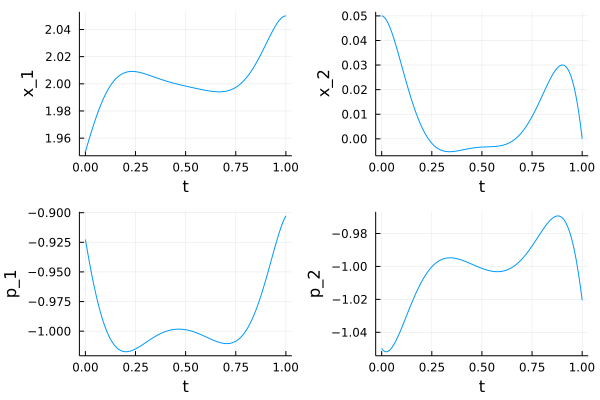

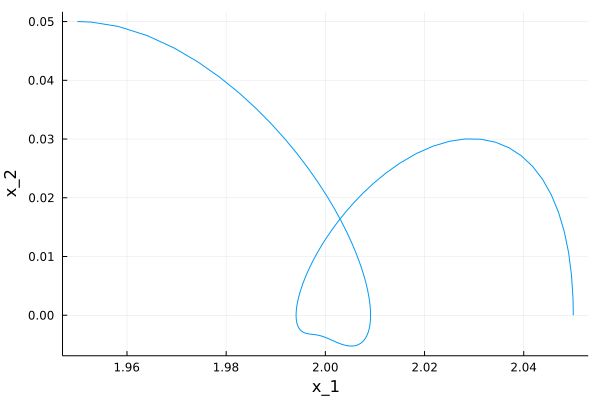

In [7]:
# Graphics
λ = par0[4]
tf = par0[5]
println("tf = ", tf)
ode_sol = f((0.5,0.),y_sol,λ=[tf], optionsODE=optionsODE)
T1 = ode_sol.t
X1 = ode_sol[1:2,:]
P1 = ode_sol[3:4,:]
T1 = T1[end:-1:1]
X1 = X1[:,end:-1:1]
P1 = P1[:,end:-1:1]
#U1 = 2 .+ P1[2,:]
ode_sol = f((0.5,1.),y_sol,λ=[tf], optionsODE=optionsODE)
T2 = ode_sol.t
X2 = ode_sol[1:2,:]
P2 = ode_sol[3:4,:]

T = [T1;T2]
X = [X1 X2]
P = [P1 P2]
#U = [U1 ; U2]
px1 = plot(T,X[1,:], xlabel = "t", ylabel = "x_1", legend=false)
px2 = plot(T,X[2,:], xlabel = "t", ylabel = "x_2", legend=false)
pp1 = plot(T,P[1,:], xlabel = "t", ylabel = "p_1", legend=false)
pp2 = plot(T,P[2,:], xlabel = "t", ylabel = "p_2", legend=false)
p_phase = plot(X[1,:], X[2,:], xlabel = "x_1", ylabel = "x_2", legend=false)
#pu = plot(T,U, xlabel = "t", ylabel = "u", label = "u")
display(plot(px1, px2, pp1, pp2, layout = (2,2)))
display(plot(p_phase))

## Homotopy on boundary conditions

In [8]:
include("Homotopy.jl")
tf = 10.
# tf = 40 dt < dtmin
par0[5] = tf
optionsODE = Dict([(:algo,Tsit5()),(:reltol,1.e-12),(:abstol,1.e-12)])
S(y,λ) = shoot_par(y,[par0[1:3];λ;par0[5]], optionsODE = optionsODE)   # shooting homotopy
println("S(y0,0.0) = ", S(y0,0.0))
println("par0 = ", par0)
h = Path(S)

S(y0,0.0) = [0.0, 0.0, 0.0, 0.0]
par0 = Any[[1.0, 1.0], [3.0, 0.0], [2.0, 0.0], 0.05, 10.0, 0.0, 1.0]


(::var"#H#14"{var"#H#12#15"{typeof(S), var"#jac#13"}}) (generic function with 1 method)

In [9]:
λ0   = 0.
λf   = 1
println("y0 = ", y0)
path1 = h(y0, λ0, λf);

y0 = [2.0, 0.0, -1.0, -1.0]

     Calls  |f(x,pars)|     |x|             Homotopic param 

         1  0.00000000e+00  2.44948974e+00  0.00000000e+00
         2  2.26530989e-12  2.44915276e+00  1.17073313e-02
         3  1.20751747e-12  2.44822191e+00  4.56901675e-02
         4  2.02910509e-11  2.44704290e+00  9.30259890e-02
         5  7.60123531e-11  2.44580598e+00  1.50078793e-01
         6  2.47789289e-10  2.44457237e+00  2.19981218e-01
         7  7.54977558e-10  2.44354643e+00  3.01346978e-01
         8  3.55580670e-09  2.44294862e+00  3.95469128e-01
         9  4.81615709e-12  2.44307925e+00  4.98573899e-01
        10  5.63500139e-12  2.44408437e+00  6.00931723e-01
        11  6.56160371e-12  2.44594609e+00  7.00521751e-01
        12  7.87506367e-12  2.44855803e+00  7.95576466e-01
        13  9.55064240e-12  2.45178550e+00  8.85637733e-01
        14  1.14078184e-11  2.45547743e+00  9.70393468e-01
        15  1.28519185e-11  2.45691228e+00  1.00000000e+00

 Results of the path so

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


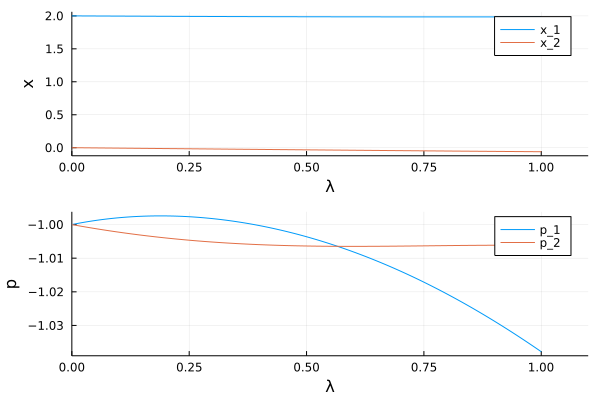

In [10]:
# Plots
path = path1
ss = path.t
px = plot(path,vars=[(5,1) (5,2)], xlabel = "λ", ylabel = "x", label = ["x_1" "x_2"], fmt=:png)
pp = plot(path,vars=[(5,3) (5,4)], xlabel = "λ", ylabel = "p", label = ["p_1" "p_2"], fmt=:png)

display(plot(px, pp, layout = (2,1)))

#ode_sol = f((t0, tf), [x0;p0])
#T = ode_sol.t
#X = ode_sol[1:2,:]
#P = ode_sol[3:4,:]
#control_vect(X,P) = P[2,:]
#U = control_vect(X, P)

#px = plot(ode_sol, vars = [1,2], xlabel = "t", ylabel = "x", label = ["x_1" "x_2"])
#pp = plot(ode_sol, vars = [3,4], xlabel = "t", ylabel = "p", label = ["p_1" "p_2"])
# Control vars = (control,0,1,2,3,4) apply the fonction control on the 5 variables t,x_1,x_2,p_1 and p_2
#control(t,x1,x2,p1,p2) = (t,control([x1,x2],[p1,p2]))
#pu = plot(ode_sol, vars = (control,0,1,2,3,4), xlabel = "t", ylabel = "u", label = "u")
#pu = plot(T, U, ylabel = "u", label = "u")
#display(plot(px, pp, pu, layout = (3,1)))

y_sol = [1.996900002250186, -0.006227701665803191, -0.998063105440176, -1.0021180567487025] i = 7
S(y_sol,λ) = [1.9821921881657545e-12, -7.079808961307776e-12, -8.035350163027033e-12, -1.712037130986721e-11]
y_sol = [1.9887214217094196, -0.025939043482062288, -1.0001913087629264, -1.0059471142523981] i = 14
S(y_sol,λ) = [-8.435308007648246e-10, 3.1965370905773227e-9, -4.532321185024557e-10, -1.2283925959755138e-9]
y_sol = [1.984908647954602, -0.044885163966852604, -1.0138688764851278, -1.0064020826718278] i = 21
S(y_sol,λ) = [-2.5792701308091637e-12, 5.5321303094046925e-12, 1.787903158856352e-12, 1.612744660040022e-12]
y_sol = [1.9857488702505388, -0.06117780956391598, -1.0378067812516343, -1.0061976740707568] i = 30
S(y_sol,λ) = [-4.062195024800985e-12, 1.181166275898704e-11, 2.204458837695711e-12, 2.0725261784537707e-12]


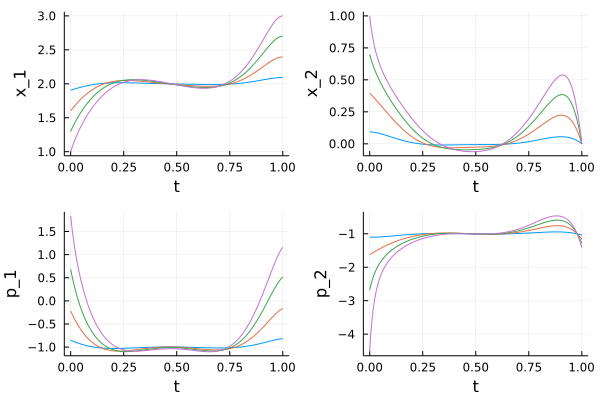

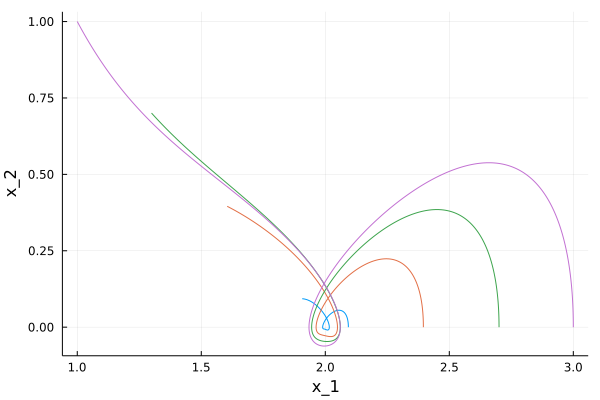

In [11]:
# Graphics
px1 = plot()
px2 = plot()
pp1 = plot()
pp2 = plot()
p_phase = plot()
n_path, m_path = size(path[:,:])
tf = par0[5]
step = m_path ÷ 4
Ind = [[i*step for i in 1:3]; m_path]
for i in Ind
    y_sol = path[1:4,i]
    λ = path[5,i]
    println("y_sol = ", y_sol," i = ",i)
    println("S(y_sol,λ) = ", S(y_sol,λ))
    ode_sol = f((0.5,0.),y_sol,λ=[tf], optionsODE=optionsODE)
    T1 = ode_sol.t
    X1 = ode_sol[1:2,:]
    P1 = ode_sol[3:4,:]
    T1 = T1[end:-1:1]
    X1 = X1[:,end:-1:1]
    P1 = P1[:,end:-1:1]

    ode_sol = f((0.5,1.),y_sol,λ=[tf], optionsODE=optionsODE)
    T2 = ode_sol.t
    X2 = ode_sol[1:2,:]
    P2 = ode_sol[3:4,:]
    T = [T1;T2]
    X = [X1 X2]
    P = [P1 P2]
    #U = [U1 ; U2]
    px1 = plot!(px1,T,X[1,:], xlabel = "t", ylabel = "x_1", legend=false)
    px2 = plot!(px2,T,X[2,:], xlabel = "t", ylabel = "x_2", legend=false)
    pp1 = plot!(pp1,T,P[1,:], xlabel = "t", ylabel = "p_1", legend=false)
    pp2 = plot!(pp2,T,P[2,:], xlabel = "t", ylabel = "p_2", legend=false)
    p_phase = plot!(p_phase,X[1,:], X[2,:], xlabel = "x_1", ylabel = "x_2", legend=false)
end


display(plot(px1, px2, pp1, pp2, layout = (2,2)))
display(plot(p_phase))
#println("tf = ",tf)

## Homotopy on the final time tf

In [12]:
println(y0)
par0[4] = 1.
println("par0 = ", par0)
# Rosenbrock23() Rodas5()
#optionsODE = Dict([(:algo,Rosenbrock23()),(:reltol,1.e-3),(:abstol,1.e-6)])
#optionsODE = Dict([(:algo,radau()),(:reltol,1.e-12),(:abstol,1.e-12)])
#optionsODE = Dict()
optionsODE = Dict([(:algo,Tsit5()),(:reltol,1.e-12),(:abstol,1.e-12)])
S(y,tf) = shoot_par(y,[par0[1:4];tf],optionsODE=optionsODE)   # shooting homotopy

h = Path(S)
tf0   = 10.
tff   = 35.   # tff = 60. dt <= dtmin
#y_sol = [1.8380780571396929, -4.524744727246662, 1.159776180023537, -1.414567989884902]
println("y_sol = ", y_sol)
println("S(y_sol,λ0) = ", S(y_sol,tf0))
path2 = h(y_sol, tf0, tff);
#path = h(y0, λ0, λf);

[2.0, 0.0, -1.0, -1.0]
par0 = Any[[1.0, 1.0], [3.0, 0.0], [2.0, 0.0], 1.0, 10.0, 0.0, 1.0]
y_sol = [1.9857488702505388, -0.06117780956391598, -1.0378067812516343, -1.0061976740707568]
S(y_sol,λ0) = [-1.1282680345559015e-9, 1.1360175022900876e-9, 1.1264105204134012e-9, 2.0725261784537707e-12]

     Calls  |f(x,pars)|     |x|             Homotopic param 

         1  1.95763364e-09  2.45691228e+00  1.00000000e+01
         2  1.95769020e-09  2.45665002e+00  1.00187731e+01
         3  1.96198278e-09  2.45561550e+00  1.00949720e+01
         4  2.01538956e-09  2.45413371e+00  1.02107592e+01
         5  2.15144288e-09  2.45256085e+00  1.03437999e+01
         6  2.71199457e-09  2.45080788e+00  1.05074354e+01
         7  4.02193081e-09  2.44906538e+00  1.06911295e+01
         8  6.98110587e-09  2.44737313e+00  1.08974929e+01
         9  1.20193541e-08  2.44583078e+00  1.11212942e+01
        10  1.97566489e-08  2.44448349e+00  1.13618404e+01
        11  3.00646043e-08  2.44337463e+00  1.16163864

y_sol = [1.9980705958972345, -0.013170170203146434, -0.9754698357376677, -1.0087139004872037] i = 26
S(y_sol,λ) = [-2.5668900449637988e-8, 6.642330263595397e-8, 1.3856559011315994e-8, 7.233454905365699e-9]
y_sol = [2.0011837774445844, 0.005435771380127737, -0.9987721908669691, -0.9987291696833651] i = 52
S(y_sol,λ) = [-5.817828518939194e-8, 1.3830516776280888e-7, 4.59932696372789e-8, 1.5924351136342718e-8]
y_sol = [1.999894994143934, -0.0005054262324706991, -0.9999615713841707, -1.0001482757762516] i = 78
S(y_sol,λ) = [-9.024362057630242e-7, 2.1420974616326305e-6, 5.514744323420473e-7, 6.216665255319442e-8]
y_sol = [1.9999970619584648, -1.1752894002908576e-5, -1.000013837164248, -1.000000353680303] i = 106
S(y_sol,λ) = [-3.732081310658941e-11, 1.8523893530186797e-10, -8.65263416471862e-12, -3.2049666739975e-11]


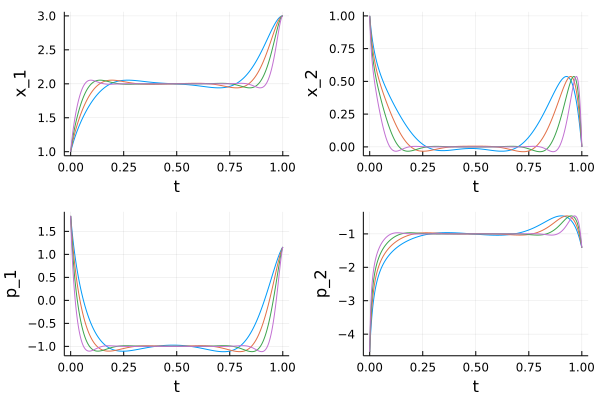

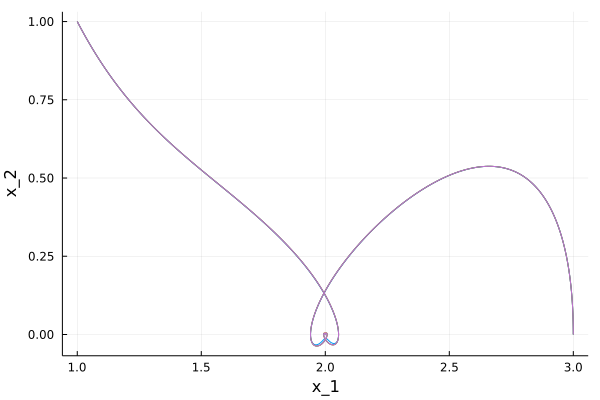

path[:,1] = [1.9857488702505388, -0.06117780956391598, -1.0378067812516343, -1.0061976740707568, 10.0]

In [13]:
# Graphics
path = path2
px1 = plot()
px2 = plot()
pp1 = plot()
pp2 = plot()
p_phase = plot()
n_path, m_path = size(path[:,:])
step = m_path ÷ 4
Ind = [[i*step for i in 1:3]; m_path]
λ = par0[4]
for i in Ind
    y_sol = path[1:4,i]
    tf = path[5,i]
    println("y_sol = ", y_sol," i = ",i)
    println("S(y_sol,λ) = ", S(y_sol,tf))
    ode_sol = f((0.5,0.),y_sol,λ=[tf], optionsODE=optionsODE)
    T1 = ode_sol.t
    X1 = ode_sol[1:2,:]
    P1 = ode_sol[3:4,:]
    T1 = T1[end:-1:1]
    X1 = X1[:,end:-1:1]
    P1 = P1[:,end:-1:1]

    ode_sol = f((0.5,1.),y_sol,λ=[tf], optionsODE=optionsODE)
    T2 = ode_sol.t
    X2 = ode_sol[1:2,:]
    P2 = ode_sol[3:4,:]
    T = [T1;T2]
    X = [X1 X2]
    P = [P1 P2]
    #U = [U1 ; U2]
    px1 = plot!(px1,T,X[1,:], xlabel = "t", ylabel = "x_1", legend=false)
    px2 = plot!(px2,T,X[2,:], xlabel = "t", ylabel = "x_2", legend=false)
    pp1 = plot!(pp1,T,P[1,:], xlabel = "t", ylabel = "p_1", legend=false)
    pp2 = plot!(pp2,T,P[2,:], xlabel = "t", ylabel = "p_2", legend=false)
    p_phase = plot!(p_phase,X[1,:], X[2,:], xlabel = "x_1", ylabel = "x_2", legend=false)
end


display(plot(px1, px2, pp1, pp2, layout = (2,2)))
display(plot(p_phase))
#println("tf = ",tf)
print("path[:,1] = ", path[:,1])

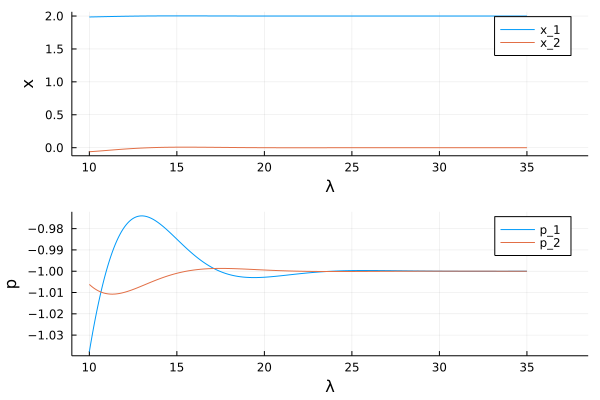

In [14]:
# Plots
ss = path.t
px = plot(path,vars=[(5,1) (5,2)], xlabel = "λ", ylabel = "x", label = ["x_1" "x_2"], fmt=:png)
pp = plot(path,vars=[(5,3) (5,4)], xlabel = "λ", ylabel = "p", label = ["p_1" "p_2"], fmt=:png)

display(plot(px, pp, layout = (2,1)))

[return to the presentation](../slides/main.pdf)